In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Beer Sales Dataset as pandas dataframe
dataset=pd.read_csv('data1.csv')

In [3]:
# Column renaming
dataset.rename(columns={'wqi':'water_quality_index'},inplace=True)
dataset.rename(columns={'dates':'DATE'},inplace=True)
dataset.head(5)

,DATE,water_quality_index
0,4/29/1986,62.0
1,5/19/1986,64.0
2,6/18/1986,67.0
3,7/24/1986,68.0
4,8/15/1986,68.0


In [4]:
# 'DATE' column is converted from 'object' data type to 'datetime' 
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
# Feature Engineering is applied to extract the Months and Years from the 'DATE' column
dataset['Year'] = dataset['DATE'].apply(lambda date:date.year)
dataset['Month'] = dataset['DATE'].apply(lambda date:date.month)
dataset.head(2)

,DATE,water_quality_index,Year,Month
0,1986-04-29,62.0,1986,4
1,1986-05-19,64.0,1986,5


In [5]:
# 'DATE' column is set as dataset index
dataset=dataset.set_index(['DATE'])
dataset.head(2)

,water_quality_index,Year,Month
DATE,,,
1986-04-29,62.0,1986,4
1986-05-19,64.0,1986,5


In [6]:
# Mapping to rename the entries of the 'Month' column
num_to_name={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                  6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['Month'] = dataset['Month'].map(num_to_name)
dataset.head(2)

,water_quality_index,Year,Month
DATE,,,
1986-04-29,62.0,1986,Apr
1986-05-19,64.0,1986,May


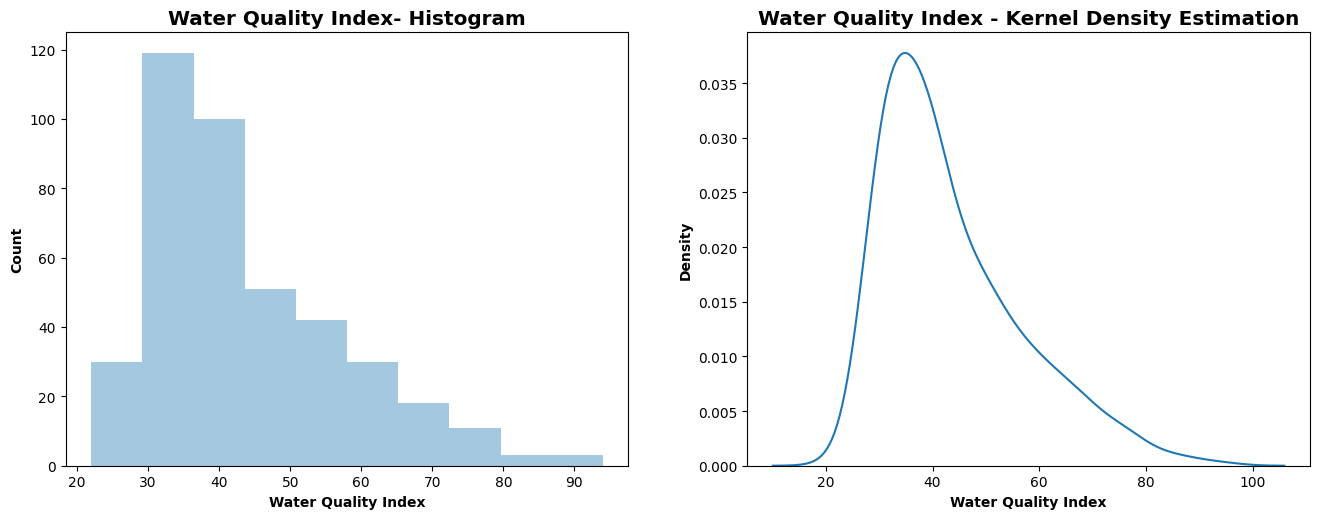

In [7]:
# Sales histogram and kernel density estimation plots
fig,axs=plt.subplots(1,2,figsize=(14,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12

sns.distplot(dataset['water_quality_index'],kde=False,bins=10,ax=axs[0])
axs[0].set_title('Water Quality Index- Histogram',fontweight='bold')
axs[0].set_xlabel('Water Quality Index',fontweight='bold')
axs[0].set_ylabel('Count',fontweight='bold')

sns.distplot(dataset['water_quality_index'],kde=True,hist=False,ax=axs[1])
axs[1].set_title('Water Quality Index - Kernel Density Estimation',fontweight='bold')
axs[1].set_xlabel('Water Quality Index',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold')


for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

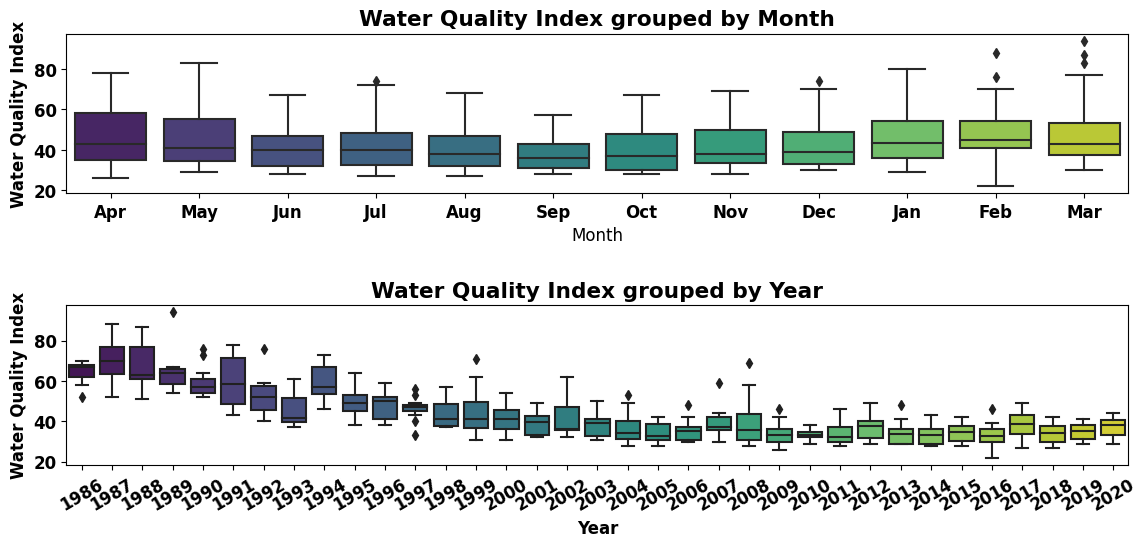

In [8]:
# Boxplots of Beer sales grouped by Month and Year. Based on the 'Months' boxplot, it can be observed that
# for both Beer and Alcohol sales, December has been the month with the highest sales (median value), whereas January the 
# month with the lowest sales (median value). In general, the total number of Beer and Alcohol sales increases over the years.
fig,axs=plt.subplots(2,1,figsize=(12,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13


sns.boxplot(x='Month',data=dataset,y='water_quality_index',palette='viridis',ax=axs[0])
axs[0].set_ylabel('Water Quality Index',fontweight='bold')
axs[0].set_title('Water Quality Index grouped by Month',fontweight='bold')
sns.boxplot(ax=axs[1],x='Year',data=dataset,y='water_quality_index',palette='viridis')
axs[1].set_xlabel('Year',fontweight='bold')
axs[1].set_ylabel('Water Quality Index',fontweight='bold')
axs[1].set_title('Water Quality Index grouped by Year',fontweight='bold')

plt.setp(axs[1].get_xticklabels(), rotation=30)
for ax in axs.flat:
   
    ax.figure.tight_layout(pad=2)

In [9]:
# Dropping the 'Year', 'Month' columns
data=dataset.drop(['Year','Month'],axis=1)
data.head()

,water_quality_index
DATE,
1986-04-29,62.0
1986-05-19,64.0
1986-06-18,67.0
1986-07-24,68.0
1986-08-15,68.0


Text(0.5, 1.0, 'Water Quality Index Time Series')

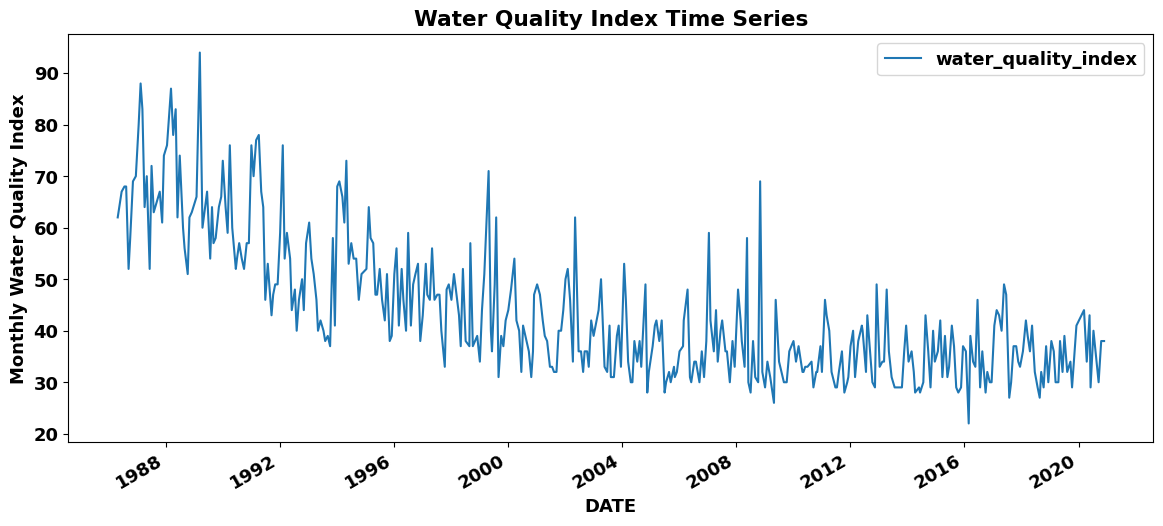

In [10]:
# Time Series Plot
data.plot(figsize=(14,6))
plt.xlabel('DATE',fontweight='bold')
plt.ylabel('Monthly Water Quality Index',fontweight='bold');
plt.title('Water Quality Index Time Series',fontweight='bold')

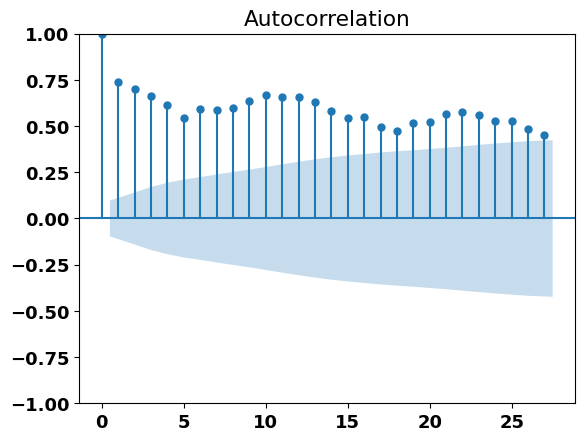

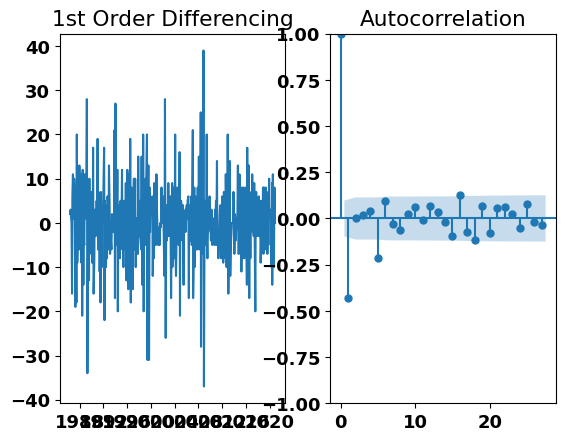

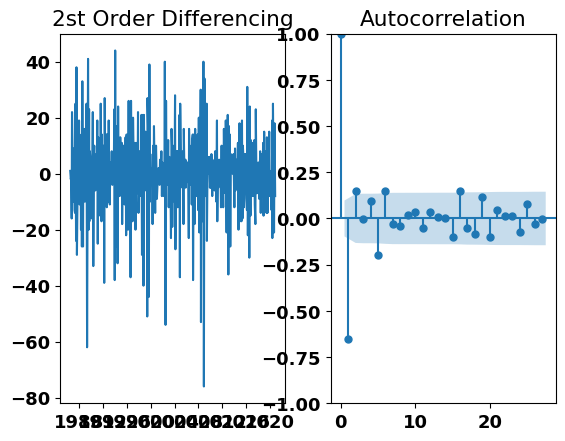

p-value:  0.0967165677301573
p-value:  3.435625826322454e-24
p-value:  9.105308436032888e-25


In [12]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

# Load the data into a pandas DataFrame called df

# Plot the autocorrelation function of the WQI time series
plot_acf(data['water_quality_index'])

# Perform first-order differencing on the time series and plot the differenced time series and its autocorrelation function
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(data['water_quality_index'].diff())
ax2 = f.add_subplot(122)
plot_acf(data['water_quality_index'].diff().dropna(), ax=ax2)
plt.show()

# Perform second-order differencing on the time series and plot the differenced time series and its autocorrelation function
ff = plt.figure()
ax1_1 = ff.add_subplot(121)
ax1_1.set_title('2st Order Differencing')
ax1_1.plot(data['water_quality_index'].diff().diff())
ax2_2 = ff.add_subplot(122)
plot_acf(data['water_quality_index'].diff().diff().dropna(), ax=ax2_2)
plt.show()

# Perform the Augmented Dickey-Fuller (ADF) test to check the stationarity of the time series at different levels of differencing
result = adfuller(data['water_quality_index'].dropna())
print('p-value: ',result[1])

result = adfuller(data['water_quality_index'].diff().dropna())
print('p-value: ',result[1])

result = adfuller(data['water_quality_index'].diff().diff().dropna())
print('p-value: ',result[1])

In [13]:
# Train the model
import time

# Début du chrono
start_time_mean_state = time.time()
# Enregistrer les temps de départ
step_times = []
# Train the model
# Create an ARIMA model with order (1, 3, 2)
arima_model = sm.tsa.arima.ARIMA(data['water_quality_index'], order=(11,1,11))

# Fit the ARIMA model
model = arima_model.fit()
# Fin du chrono
end_time_mean_state = time.time()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Calcul de la durée d'entraînement en secondes
training_time_mean_state = end_time_mean_state - start_time_mean_state
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_mean_state, "secondes")

Le temps d'entraînement est de 13.3375563621521 secondes


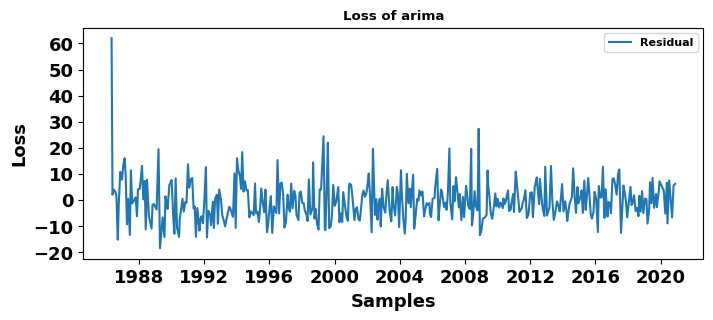

In [35]:
fig, ax = plt.subplots(figsize=(8,3))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size'] = 8
train_loss = pd.DataFrame(model.resid)
ax.plot(train_loss,label='Residual')
ax.set_title('Loss of arima', fontweight='bold')
ax.set_xlabel('Samples', fontweight='bold')
ax.set_ylabel("Loss", fontweight='bold')
ax.legend(loc='upper right', fontsize=8)
plt.show()

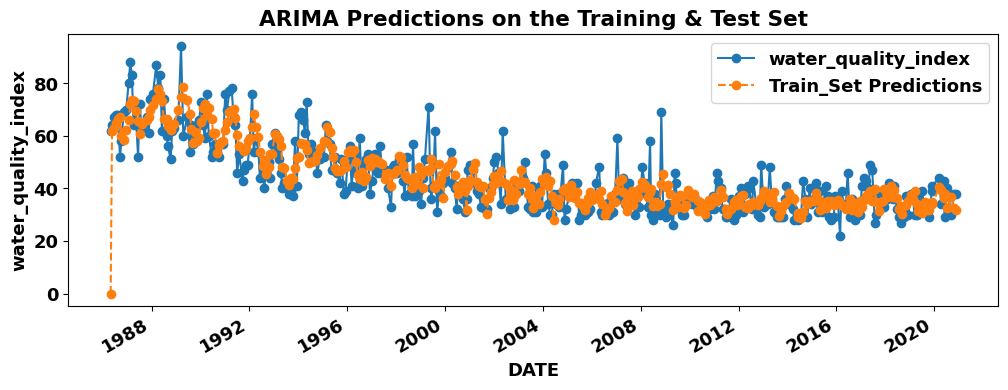

In [27]:
train_predictions = predictions = model.predict(start=data.index[0])
train_df = pd.DataFrame(data=train_predictions.to_frame().values, index=data.index, columns=['Train_Set Predictions'])
# Tracer le graphique en utilisant les données d'origine, les prévisions du modèle sur l'ensemble d'entraînement et les prévisions du modèle sur l'ensemble de test
ax = data.plot(figsize=(12,4), marker='o', linestyle='-')
train_df.plot(ax=ax, marker='o', linestyle='--', legend=True)
# Personnaliser le graphique
plt.title('ARIMA Predictions on the Training & Test Set', fontweight='bold')
plt.ylabel('water_quality_index', fontweight='bold')
plt.xlabel('DATE', fontweight='bold')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, ' DATE')

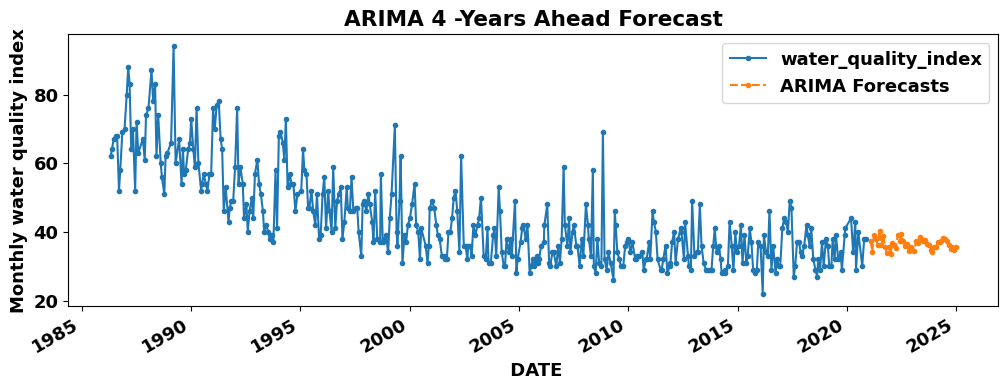

In [34]:
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2024-12-01')
forecast_index = pd.date_range(start=start_date, end=end_date, freq='MS')
cnn_outputs = model.forecast(steps=len(forecast_index))
cnn_outputs.index = forecast_index
cnn_forecast_index=pd.date_range(start='2021-01-01',periods=48,freq='M')
# Converting the cnn_outputs from np.ndarray to pandas dataframe
cnn_forecast_df=pd.DataFrame(data=cnn_outputs.to_frame().values,index=cnn_forecast_index,columns=['ARIMA Forecasts'])
# Plot comprising the original time series,and the 48-month CNN forecasts
ax=data.plot(figsize=(12,4),marker='o',linestyle='-',markersize=3)
cnn_forecast_df.plot(ax=ax,marker='o',linestyle='--',markersize=3)
plt.title('ARIMA 4 -Years Ahead Forecast',fontweight='bold')
plt.ylabel('Monthly water quality index',fontweight='bold')
plt.xlabel(' DATE',fontweight='bold')